<a href="https://colab.research.google.com/github/DhanalakshmiSengottaiyan/ML_DecisionTree/blob/main/Decision_Tree_(Indian_Diabetes_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement:
To detect whether diabetics is predictable(1) or not(0) for the data based on the selected input features.
# **Importing the dataset**

In [ ]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [ ]:
pima = pd.read_csv(io.BytesIO(uploaded['pima-indians-diabetes.csv']))

In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Data Dictionary**

In [ ]:
#pregnant = Number of times pregnant
#glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#bp = Diastolic blood pressure (mm Hg)
#skin = Triceps skin fold thickness (mm)
#insulin = 2-Hour serum insulin (mu U/ml)
#BMI = Body mass index (weight in kg/(height in m)^2)
#pedigree = Diabetes pedigree function
#age = Age (years)
#label = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [ ]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

**Splitting data into test and train**

In [ ]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

**Building model without any tuning of hyperparameter**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dtree = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtree = dtree.fit(X_train,y_train)

#Predict the response for train and test dataset
y_pred_train = dtree.predict(X_train)
y_pred_test = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Model Accuracy, how often is the classifier correct?
print(f'Train accuracy {accuracy_score(y_pred_train,y_train)}')
print(f'Test accuracy {accuracy_score(y_pred_test,y_test)}')

#Our model accuracy is high for train and low for test so it is a classical case of "Overfittig"

Train accuracy 1.0
Test accuracy 0.6753246753246753


TestConfusion matrix


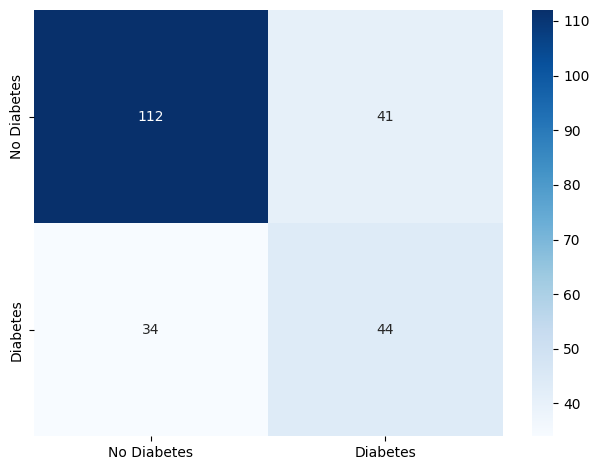

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

classes = ['No Diabetes','Diabetes']

print('TestConfusion matrix')
cf = confusion_matrix(y_pred_test,y_test)
sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Blues', fmt='g')
plt.tight_layout()
plt.show()

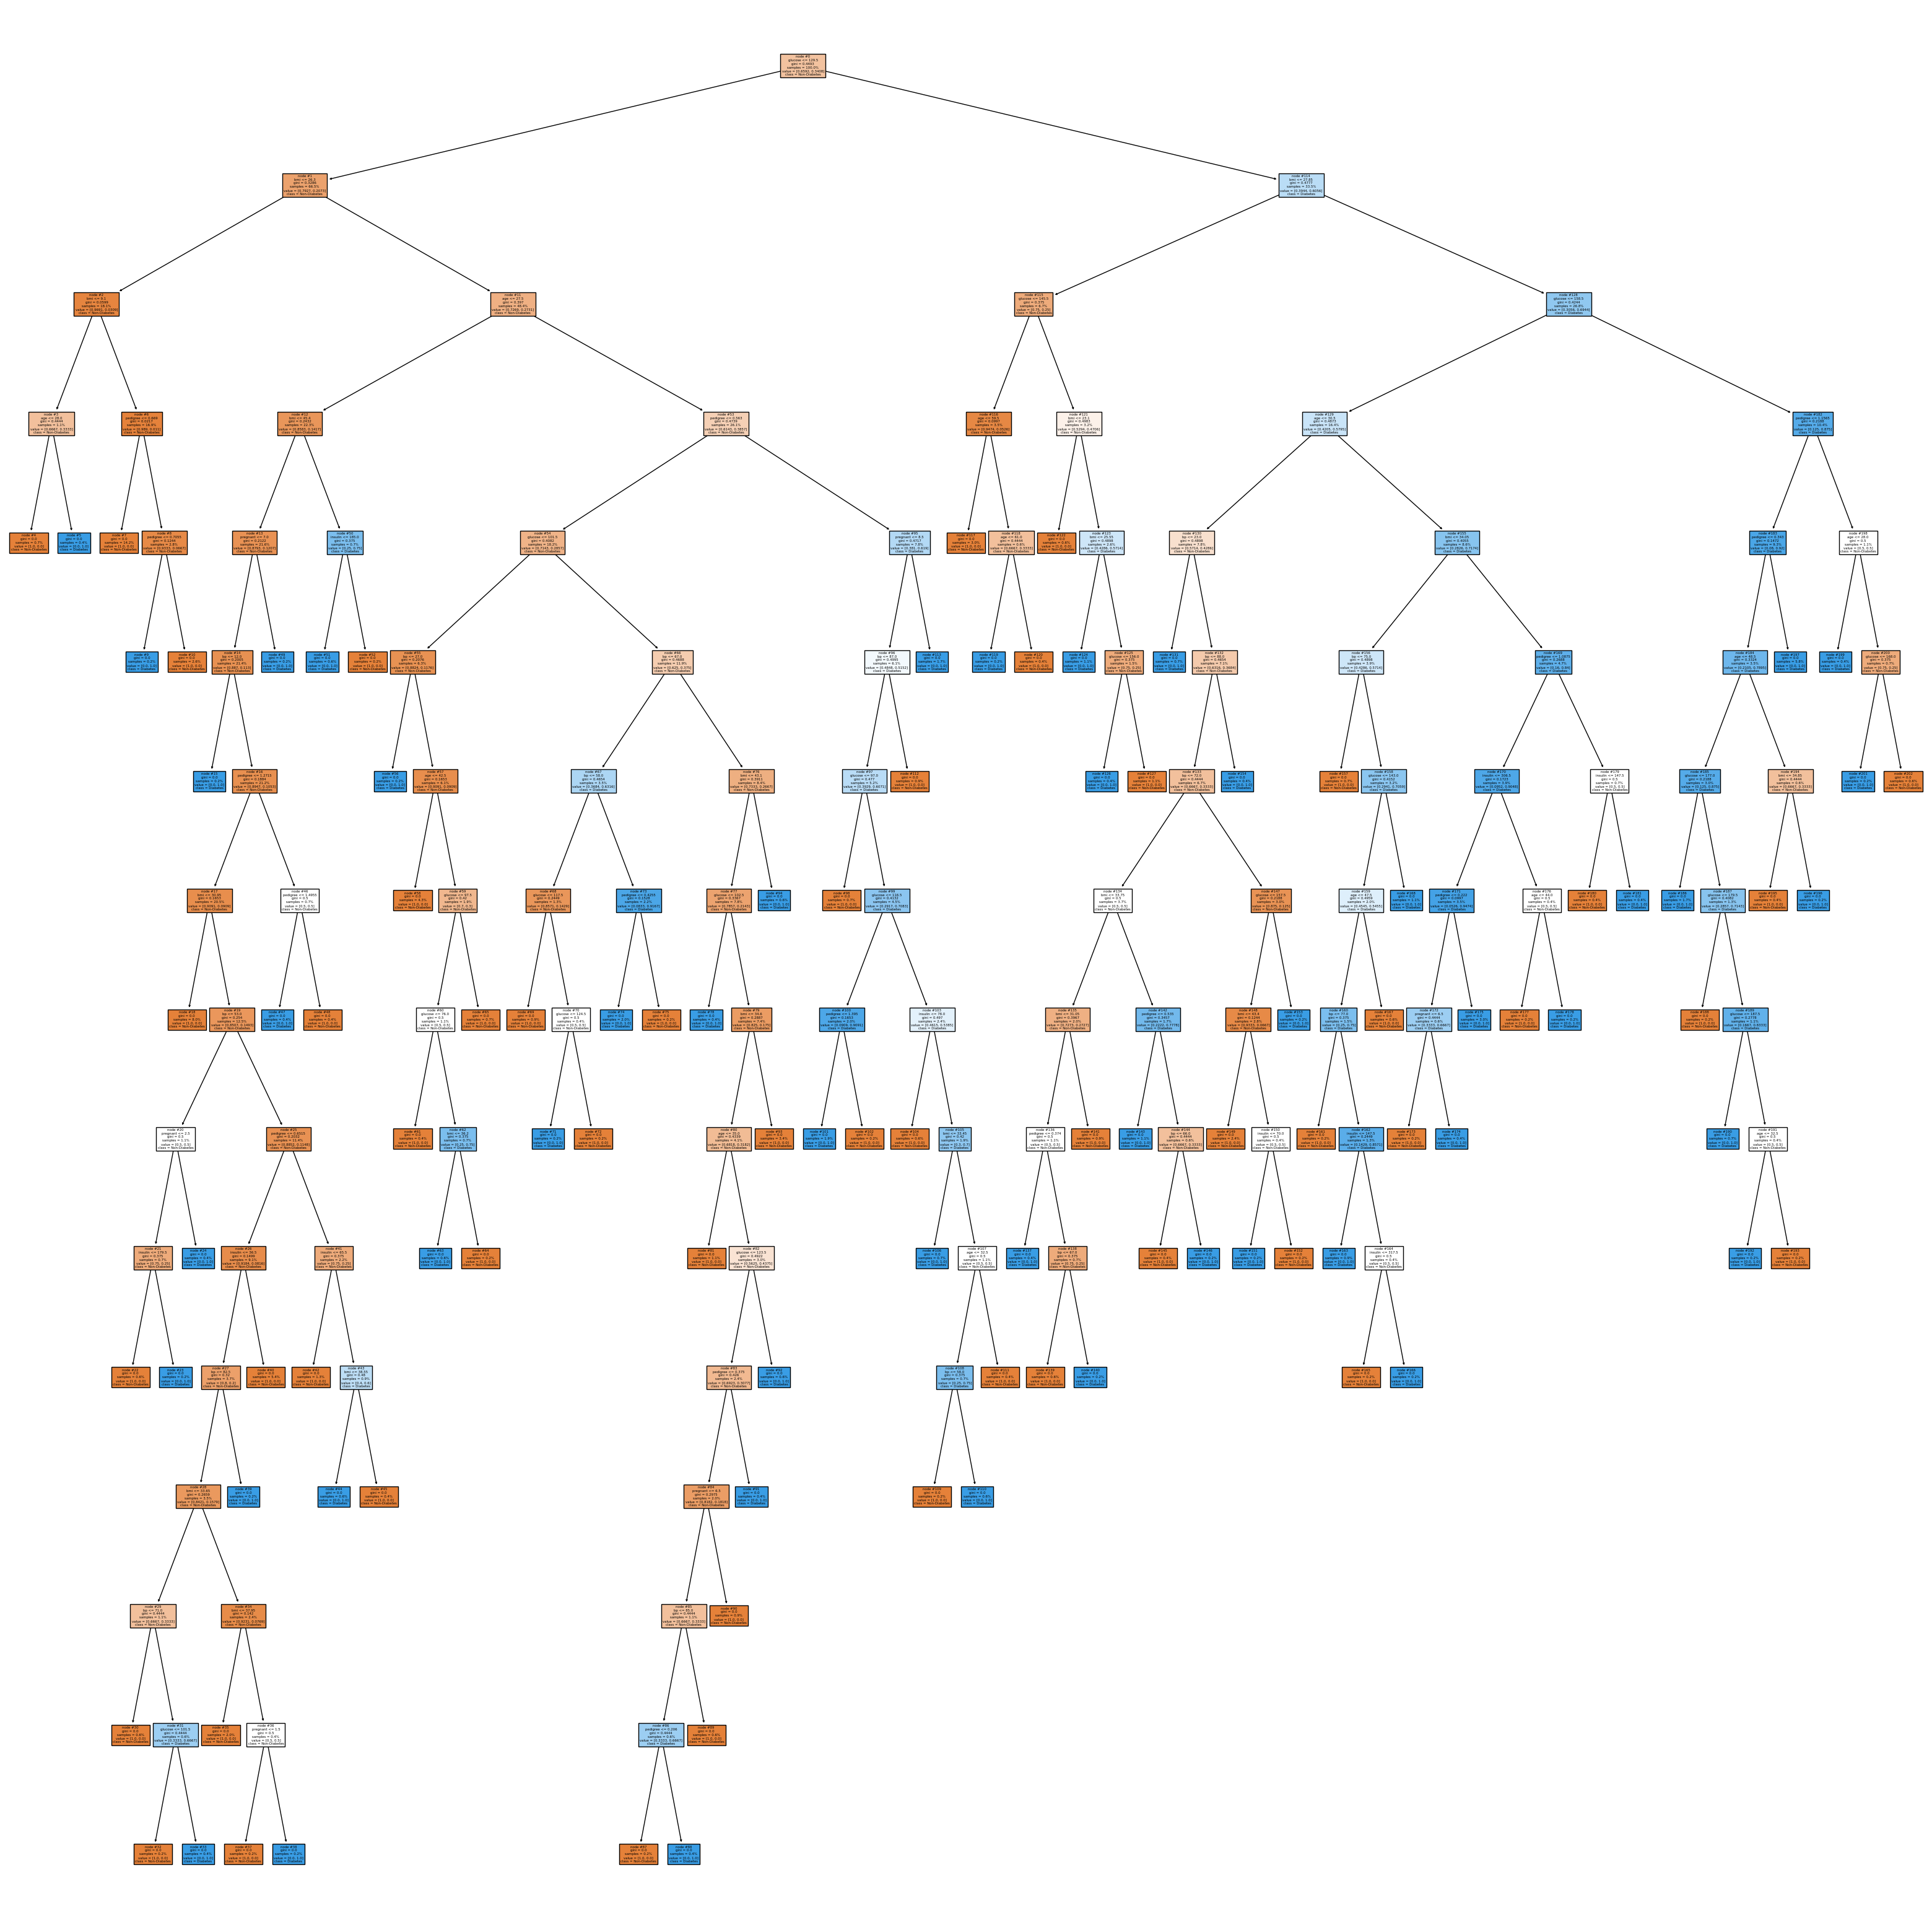

In [ ]:
# Visualising the graph without the use of graphviz
# filled=True filles the color to indicate the majority class
# "precision" represents the number of decimal places needed for "gini"
# rounded:  When set to 'True', draw node boxes with rounded corners
# node_ids: When set to True, show the ID number on each node.
# proportion: When set to True, change the display of ‘values’ and/or ‘samples’ to be proportions and percentages respectively.

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (40,40))
dec_tree = plot_tree(decision_tree=dtree, feature_names = X.columns,
                     class_names =["Non-Diabetes", "Diabetes"] , filled = True , precision = 4,
                     rounded = False, node_ids=True, proportion=True)

plt.savefig("one.png")

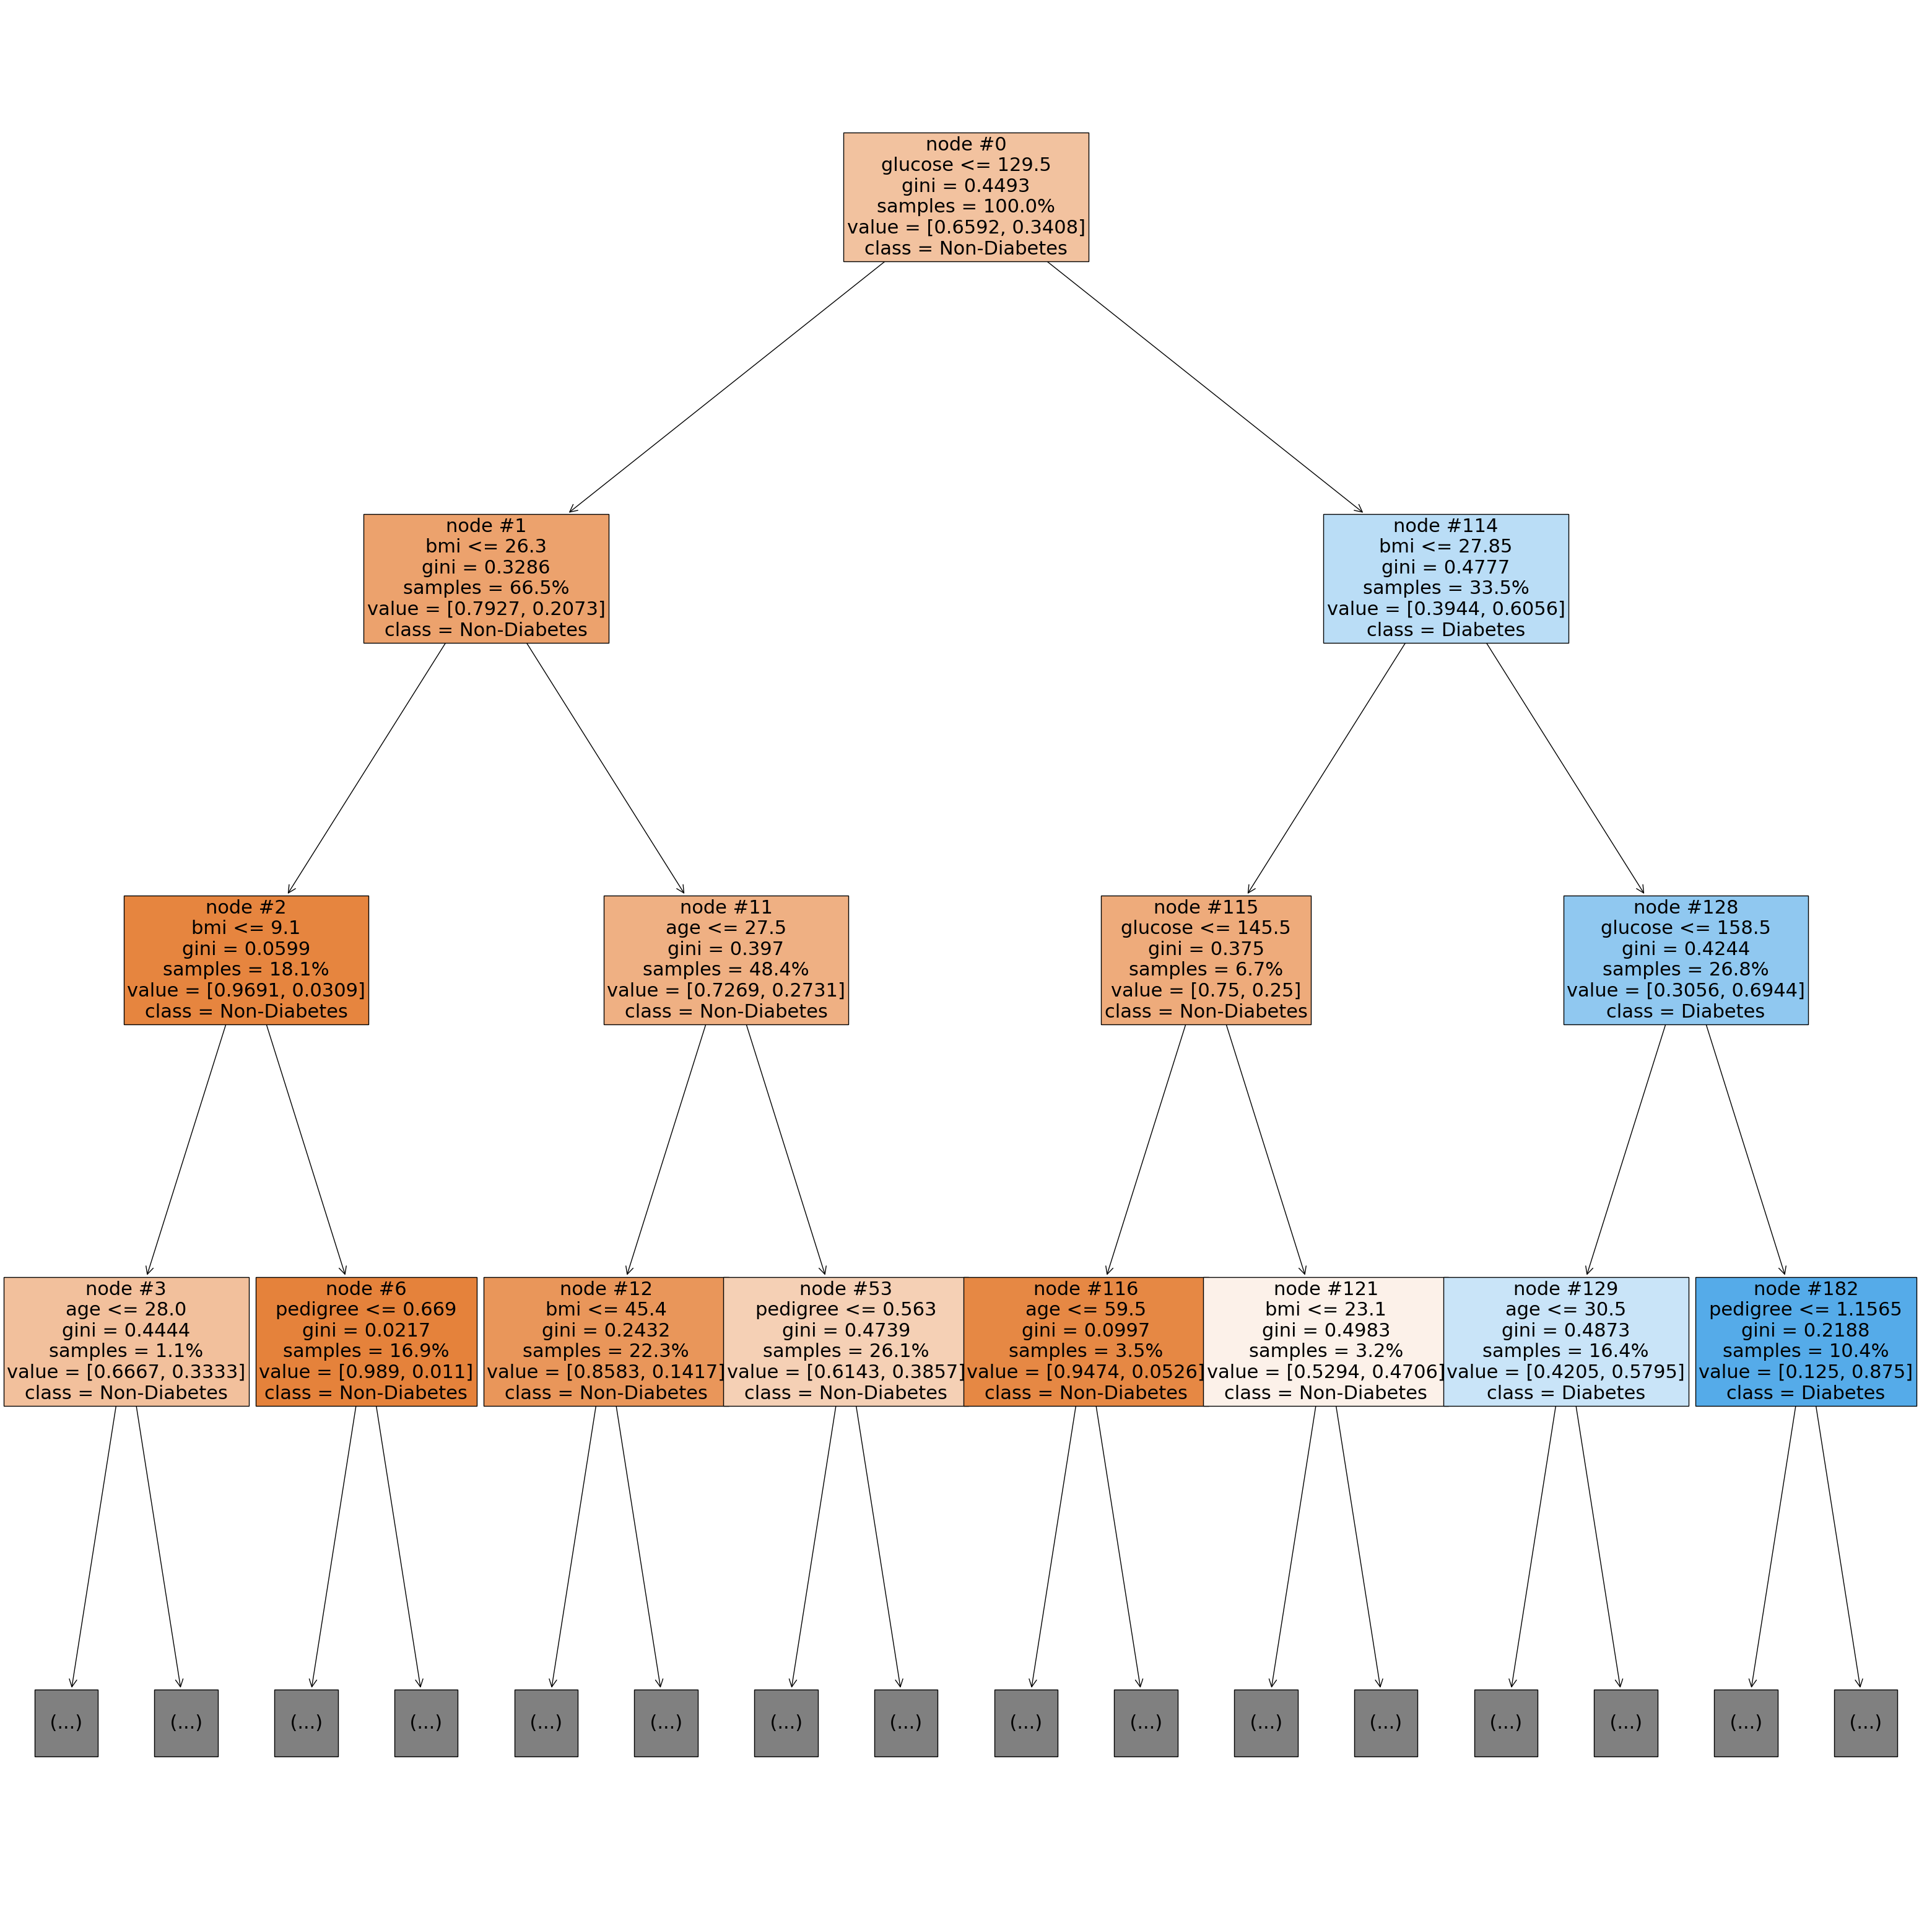

In [ ]:
# Visualising the graph with only depth of "3"

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (40,40))
dec_tree = plot_tree(decision_tree=dtree, feature_names = X.columns,
                     class_names =["Non-Diabetes", "Diabetes"] , filled = True , precision = 4,
                     rounded = False, node_ids=True, proportion=True, max_depth=3, fontsize=22)

plt.savefig("one.png")

**Tuning the paramters using "GridSearchCV"**

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}


#total number of trees iterations = 6*3*2

clf = DecisionTreeClassifier(random_state=0)
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
#min_sample_leaf and min_sample_split may or may not come into picture depending upon if it is needed or not (Tree with small depth sometimes don't need these)
#Try running above code with only "10" and "12" as a depth and see how the results might change

dt_model = gcv.best_estimator_
dt_model

DecisionTreeClassifier(max_depth=4, random_state=0)

Train score 0.8044692737430168
Test score 0.7705627705627706
TestConfusion matrix


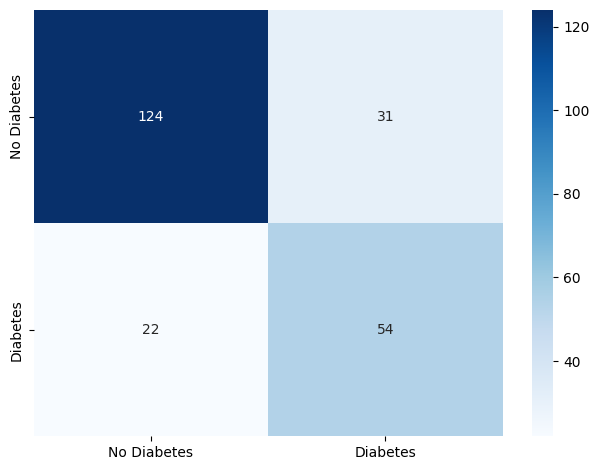

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
classes = ['No Diabetes','Diabetes']


dt_model.fit(X_train,y_train)
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

print('TestConfusion matrix')
cf = confusion_matrix(y_test_pred,y_test)
sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Blues', fmt='g')
plt.tight_layout()
plt.show()

#Earlier the train score was 100% and Test score ~68%
#Now our train score is 80% and test score is 77%

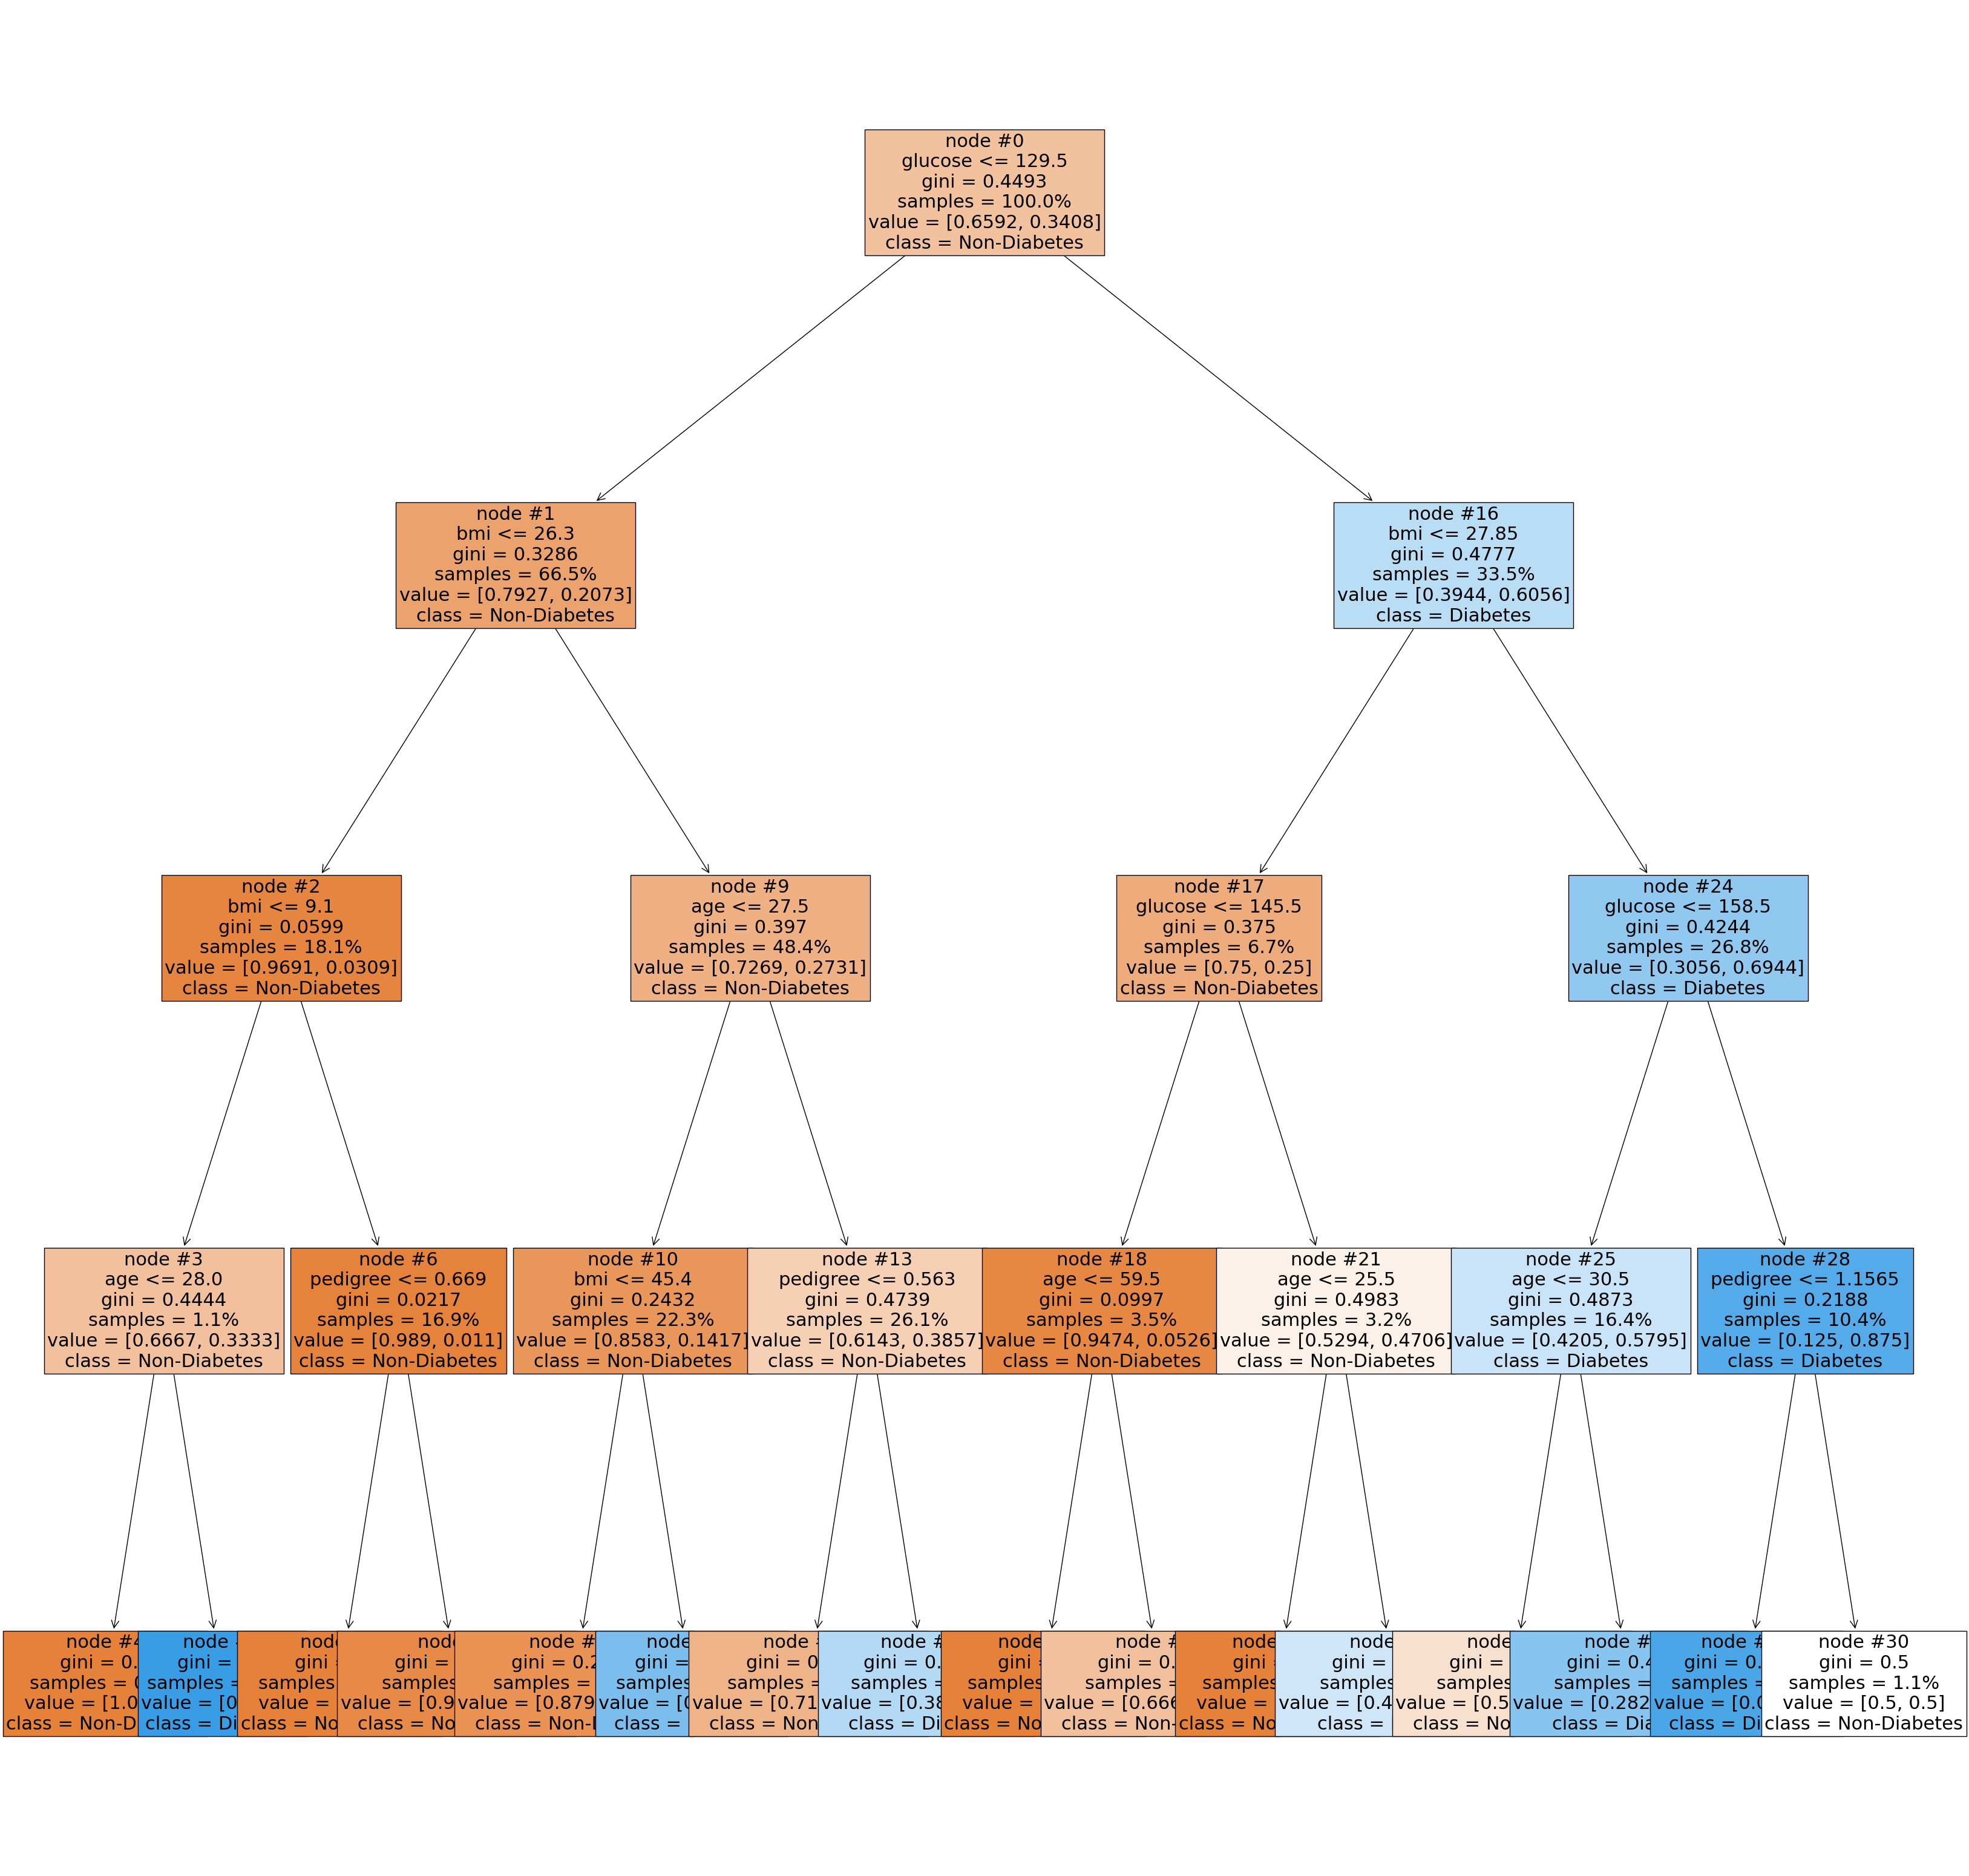

In [ ]:
# Visualising the graph without the use of graphviz
# filled=True filles the color to indicate the majority class
# "precision" represents the number of decimal places needed for "gini"
# rounded:  When set to 'True', draw node boxes with rounded corners
# node_ids: When set to True, show the ID number on each node.
# proportion: When set to True, change the display of ‘values’ and/or ‘samples’ to be proportions and percentages respectively.

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (40,40))
dec_tree = plot_tree(decision_tree=dt_model, feature_names = X.columns,
                     class_names =["Non-Diabetes", "Diabetes"] , filled = True , precision = 4,
                     rounded = False, node_ids=True, proportion=True, fontsize=22)

plt.savefig("one.png")